In [1]:
import importlib
import os
import argparse
import time

from torchvision import datasets
from torchvision import transforms
import torch
import torch as th
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

import datasets as ds
import models
import utils
from PoseExtraction import PoseNormalization
from multiPoseExtraction import MultiPoseExtraction

import matplotlib.pyplot as plt
import glob
import imageio
import matplotlib.patches as patches
import cv2
import numpy as np 

def crop_face(img, x, y, width, height):
    img_height, img_width, _ = img.shape
    start_y = max(y - height, 0)
    end_y = min(y + height, img_height - 1)

    start_x = max(x - width, 0)
    end_x = min(x + width, img_width - 1)
    return img[start_y: end_y, start_x: end_x, :]

def parse_num(num_string):
    previous_sign = 1
    parse_str = ""
    final_nums = []
    num_sign = ['-', '+']
    for c in num_string:
        if c in num_sign:
            if parse_str == "":
                pass
            else:
                final_nums.append(int(parse_str)*previous_sign)
                parse_str = ""
            if c == '-':
                previous_sign = -1
            elif c == '+':
                previous_sign = 1
        else:
            parse_str += c
            
    return final_nums

def plot_head(example_img, position, size, ax):  
    width, height, channels = example_img.shape
    head_width = example_person['position'][0]
    head_height = example_person['position'][1]
    position = (head_width - (example_person['size'][0]/2), head_height - (example_person['size'][1]/2))
    
    ax.imshow(example_img)
    rect = patches.Rectangle(position, *example_person['size'],
                             linewidth=1,edgecolor='r',facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)
    ax.boxplot
    return ax

Loaded From File
(944, 3, 64, 64) (944,) (64, 64)
torch.Size([944, 3, 64, 64])
torch.Size([944])
torch.Size([406, 3, 64, 64])
torch.Size([406])
tensor([ 12,   4,  14,   0,  13,   0,   2,   8,   2,  14])
tensor([ 14])
tensor([ 3])
tensor([ 12,   4,  14,   0,  13,   0,   2,   8,   2,  14,   1,  10,
          5,   0,  11,   4,   6,   3,   3,   5,   6,  11,  11,  12,
         14,   5,   1,   1,   3,  10,   5,   1])


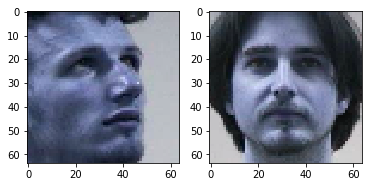

In [2]:
train_loader, test_loader, dataset_details = ds.facialRecognition()
for (img, label) in train_loader:
    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(utils.tensor_to_numpy_img(img[9:10]))
    ax[1].imshow(utils.tensor_to_numpy_img(img[18:19]))
    print(label[9:10])
    print(label[18:19])
    print(label)
    break

In [8]:
from models.facialRecognition import PINNBasic, STNBasic, CNNBasic, MultiPINNBasic

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
batch_size, channel_num, height, width = dataset_details

cnn = CNNBasic().to(device)
pinn = PINNBasic().to(device)
# stn = STNBasic().to(device)
criterion_cnn = nn.CrossEntropyLoss()
criterion_pinn = nn.CrossEntropyLoss()
# criterion_stn = nn.MSELoss()

In [12]:
learning_rate = 0.0005
batch_num = 100
epoch_num = 100

optimizer_cnn = torch.optim.Adam(cnn.parameters(), lr=learning_rate)
optimizer_pinn = torch.optim.Adam(pinn.parameters(), lr=learning_rate)
# cnn, cnn_loss, cnn_acc, cnn_validation_loss = utils.train_net(cnn, train_loader, test_loader, criterion_cnn, optimizer_cnn, batch_num, epoch_num)
pinn, pinn_loss, pinn_acc, pinn_val = utils.train_net(pinn, train_loader, test_loader, criterion_pinn, optimizer_pinn, batch_num, epoch_num)

TOTAL TRAIN 944
TOTAL VALIDATION 188
TOTAL TEST 406
Loss: 0.007098962694911634, Acc: 0.736228813559322, Validation Loss: 0.007794123460003671
Loss: 0.006954931764531944, Acc: 0.7266949152542372, Validation Loss: 0.005230523170308864
Loss: 0.007780267430816667, Acc: 0.7341101694915254, Validation Loss: 0.00245870237654828
Loss: 0.006420654923481457, Acc: 0.7425847457627118, Validation Loss: 0.006445806156447593
Loss: 0.00587531032387988, Acc: 0.7415254237288136, Validation Loss: 0.0038433665053007452
Loss: 0.00851016228039891, Acc: 0.7161016949152542, Validation Loss: 0.008611001312098604
Loss: 0.006080176854916549, Acc: 0.7436440677966102, Validation Loss: 0.006913339600284049
Loss: 0.0047206847249703894, Acc: 0.763771186440678, Validation Loss: 0.0020084855483567463
Loss: 0.005724748407127493, Acc: 0.736228813559322, Validation Loss: 0.01747530143945775
Loss: 0.005844055019887322, Acc: 0.7372881355932204, Validation Loss: 0.002742808876915815
Loss: 0.00557781373924118, Acc: 0.74364406

Loss: 0.0035206594867473943, Acc: 0.7669491525423728, Validation Loss: 0.039293310426651164
Loss: 0.002548636424639341, Acc: 0.7733050847457628, Validation Loss: 0.0037330038488862364
Loss: 0.002731781089836258, Acc: 0.7722457627118644, Validation Loss: 0.007784297808687737
Loss: 0.0027153008238617648, Acc: 0.777542372881356, Validation Loss: 0.012706414261396895
Loss: 0.003072302117628061, Acc: 0.7690677966101694, Validation Loss: 0.007287347649640226
Loss: 0.002552483159796161, Acc: 0.7690677966101694, Validation Loss: 0.0008571673026110263
Loss: 0.0035163373449596308, Acc: 0.760593220338983, Validation Loss: 0.04281469291829048
Loss: 0.0023456653737920826, Acc: 0.7764830508474576, Validation Loss: 0.009498793869576555
Loss: 0.0028886042487949637, Acc: 0.7680084745762712, Validation Loss: 0.0032716698825676392
Loss: 0.0026643728458527792, Acc: 0.7648305084745762, Validation Loss: 0.04505321415180855


In [13]:
class MulitPoseSubNet(nn.Module):
    def __init__(self):
        super(MulitPoseSubNet, self).__init__()
        self.net = nn.Sequential(pinn.features1)
    
    def forward(self, x):
        x_h = pinn.pose_features(x)
        _, means, orientations, confidence, theta, (L1, L2) = pinn.pose_estimator(x_h)
        x_h = pinn.pose_estimator.channel_compress(x_h)
        grid = F.affine_grid(theta, x.size())
        x = F.grid_sample(x, grid)
        return x, x_h, means, orientations, (L1, L2)
    
pre_pose = MulitPoseSubNet()

pre_index = 10
for temp_index, (img, label) in enumerate(train_loader):
    img_batch = img
    label_batch = label
    if pre_index == temp_index:
        break

tensor([ 16.7049,  24.5430], device='cuda:0') tensor([ 0.8881, -0.4597], device='cuda:0')
tensor([ 37.0385,  22.2495], device='cuda:0') tensor([ 0.8113, -0.5846], device='cuda:0')
tensor([ 36.3650,  23.6173], device='cuda:0') tensor([ 0.6493, -0.7605], device='cuda:0')
tensor([ 24.2509,  20.9397], device='cuda:0') tensor([ 0.9998, -0.0220], device='cuda:0')
tensor([ 36.9970,  23.7145], device='cuda:0') tensor([ 0.7869, -0.6171], device='cuda:0')
tensor([ 18.5842,  29.0898], device='cuda:0') tensor([ 0.9848, -0.1735], device='cuda:0')
tensor([ 20.3811,  23.3785], device='cuda:0') tensor([ 0.9882, -0.1535], device='cuda:0')
tensor([ 19.3883,  27.6055], device='cuda:0') tensor([ 0.2345, -0.9722], device='cuda:0')
tensor([ 18.5171,  22.0452], device='cuda:0') tensor([ 0.9471, -0.3210], device='cuda:0')
tensor([ 21.1964,  26.9305], device='cuda:0') tensor([ 0.5415, -0.8407], device='cuda:0')
tensor([ 27.1600,  23.9667], device='cuda:0') tensor([ 0.9296, -0.3686], device='cuda:0')
tensor([ 3

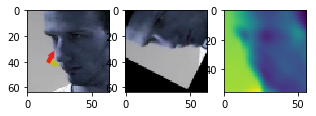

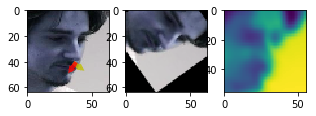

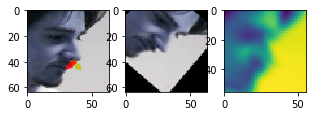

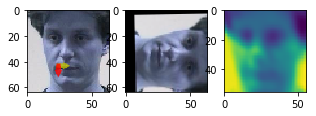

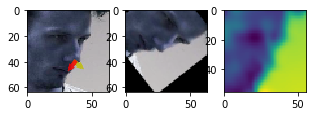

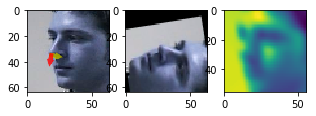

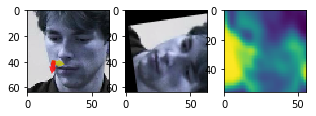

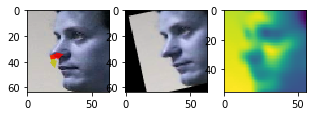

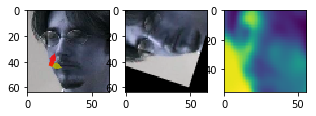

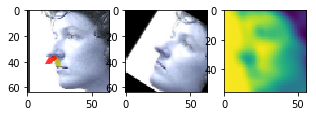

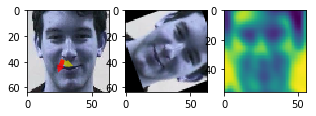

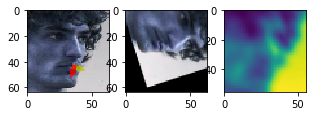

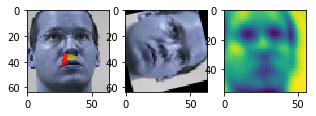

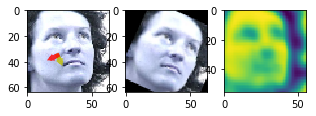

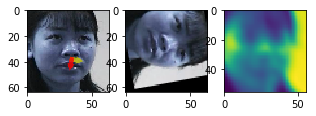

In [32]:
import importlib

# pose_extractor = PoseNormalization(1, (16, 16)).to(device)
# multi_pose_extractor = MultiPoseExtraction(32).to(device)
def plot_arrow_img(ax, means, orientations, img_shape, arrow_scale=2, color=(1, 0, 0), alpha=0.8):
    mean_x = means[0].cpu().data.numpy()
    mean_y = means[1].cpu().data.numpy()

    rot = orientations.cpu().data.numpy()
    arrow_start = (mean_x, img_shape[1] - mean_y)
    arrow_end = (rot[0]*arrow_scale, -1*rot[1]*arrow_scale)

    #         ax[index % row_length].arrow(arrow_start[0], arrow_start[1], arrow_end[0], arrow_end[1], 
    #                     head_width=0.5, head_length=1, fc='red', ec='r', linewidth=4, alpha=1)

    ax.arrow(arrow_start[0], arrow_start[1], arrow_end[0], arrow_end[1], 
                head_width=arrow_scale/8, head_length=arrow_scale/8, fc='red', ec=color, linewidth=4, alpha=alpha)


for index in range(15):
    index += 0
    current_img = img_batch[index:index+1]
    x, x_h, means_orig, orientations_orig, (L1, L2) = pre_pose(current_img.cuda())
#     print((L1[0] / L2[0]) - 1)
    mean = means_orig[0, :, 0]
    orientation1 = orientations_orig[0, :, 0]
    orientation2 = orientations_orig[0, :, 1]
    print(mean, orientation1)
    
    fig2, ax2 = plt.subplots(1, 3, figsize=(5, 5))
    ax2[0].imshow(utils.tensor_to_numpy_img(current_img))
    ax2[1].imshow(utils.tensor_to_numpy_img(x))
    ax2[2].imshow(utils.tensor_to_numpy_img(x_h))
    plot_arrow_img(ax2[0], mean, orientation1, (64, 64), color='y', arrow_scale=5)
    plot_arrow_img(ax2[0], mean, orientation2, (64, 64), color='r', arrow_scale=5)
    

In [158]:
import numpy as np
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import utils

def tensor_to_coord_tensor(X):
    """
    Takes in a 4D image and returns the 3*W*H coordinate representation
    """
    device = X.device
    batch_num, channel_num, height, width = X.shape
    flattened_img = X.permute((0, 1, 3, 2)).contiguous().view(batch_num, -1)
    x_coord = torch.arange(0, width).view(width, 1)
    x_coord = x_coord.expand(width, height).contiguous()
    x_coord = x_coord.view(width * height).float().expand(batch_num, -1).to(device)

    y_coord = torch.arange(height, 0, -1) - 1
    y_coord = y_coord.expand(width, height).contiguous()
    y_coord = y_coord.view(width * height).float().expand(batch_num, -1).to(device)
        
    coord_matrix = torch.stack([x_coord, y_coord, flattened_img])

    return coord_matrix.permute((1, 0, 2))


class KernelCompress(torch.nn.Module):
    def __init__(self, in_channels):
        super(KernelCompress, self).__init__()
        self.conv2d = torch.nn.Conv2d(in_channels, 1, 1)   # hidden layer
        self.conv2d.weight = torch.nn.Parameter(torch.ones(1,in_channels,1,1))
        self.conv2d.bias = torch.nn.Parameter(torch.zeros(1))
        self.softmax = torch.nn.Softmax2d()

    def forward(self, x):
        x = torch.abs(x)
        x = self.conv2d(x)
        x = x / torch.sum(self.conv2d.weight)
        return x

def rot_mat(theta):
    theta = torch.Tensor([theta])
    c, s = torch.cos(theta), torch.sin(theta)
    R = torch.Tensor(((c,-s), (s, c)))
    return R


class PoseNormalization2(torch.nn.Module):
    def __init__(self, channel_num, img_shape):
        super(PoseNormalization2, self).__init__()
        self.flip_y_loc = torch.Tensor([[2 , 0], [0, -2]])
        self.mu_R = torch.Tensor([0.5, 0.5])
        self.rotate_pi = torch.Tensor([[-1 ,0], [0, 1]])
        self.pi = 3.14159265358979323
        self.theta_R = (self.pi / 2)
        self.channel_compress = KernelCompress(channel_num)   # hidden layer
        # self.weights = torch.nn.Parameter(torch.eye(img_shape[1] * img_shape[0]), requires_grad=True)
        # self.weights = torch.nn.Parameter(torch.rand([img_shape[1] * img_shape[0], img_shape[1] * img_shape[0]]), requires_grad=True)
    
    def strength_cofficient(self, L1, L2):
        """
        Measure the relative strength of the first eigen value to the second
        """
        scaling_cofficient = 1
        eig_ratio = (L1 / L2) - 1
        if torch.nonzero(eig_ratio != eig_ratio).shape[0] > 0:
            print("BROKEN EIG VAL:", L1, L2)
            exception = Exception()
            exception.loc = torch.nonzero(eig_ratio != eig_ratio)[0][0]
            raise exception
        confidence = 2*(F.sigmoid(scaling_cofficient * eig_ratio) - 0.5)
        return confidence
    
    def left_svd_tensor(self, T):
        eps = 0.001
        device = T.device
        # X = torch.bmm(T, torch.bmm(self.weights.expand(T.shape[0], *self.weights.shape).to(device), T.permute(0, 2, 1)))
        X = torch.bmm(T, T.permute(0, 2, 1))

        D = X[:, 0, 0]* X[:, 1, 1] - X[:, 0, 1]*X[:, 1, 0]
        D = D.unsqueeze(1).unsqueeze(2)
        X = torch.mul((1 / (D + 0.001)), X)

        T = X[:, 0, 0] + X[:, 1, 1]
        D = X[:, 0, 0] * X[:, 1, 1] - X[:, 0, 1]*X[:, 1, 0]

        L1 = (T + torch.sqrt(F.relu((T**2) - 4*D))) / 2
        L2 = (T - torch.sqrt(F.relu((T**2) - 4*D))) / 2

        v1 = torch.stack([L1 - X[:, 1, 1], X[:, 1, 0]])
        v2 = torch.stack([L2 - X[:, 1, 1], X[:, 1, 0]])
        U = torch.stack([v1, v2]).permute(2, 0, 1)
        U = torch.nn.functional.normalize(U,  dim=2)
        confidence = self.strength_cofficient(L1, L2)
        return U, confidence, L1, L2

    def rot_mat_tensor(self, thetas):
        num_tensors = thetas.shape[0]
        c = torch.cos(thetas).unsqueeze(1).unsqueeze(2)
        s = torch.sin(thetas).unsqueeze(1).unsqueeze(2)
        R = torch.stack([torch.cat([c, -1*s], dim=1),  torch.cat([s, c], dim=1)], dim=1).squeeze(3)
        return R

    def tensor_orientation_transform(self, U, confidence):
        rot_lambda = torch.fmod(torch.atan2(U[:, 0, 1], U[:, 0, 0]) + 2 * self.pi, self.pi)
        diff_angle = (self.theta_R - rot_lambda)

        rotation = self.rot_mat_tensor(diff_angle).float()
        return rotation

    def forward(self, img_tensor):
        epsilon = 0.001
        # try:
        batch_size, channel_num, height, width = img_tensor.shape
        device = img_tensor.device
        img_scale_norm_mat = torch.Tensor([[1 / width , 0], [0, 1 / height]]).to(device)
        compressed_img_tensor = self.channel_compress(img_tensor)


        coord_tensor = tensor_to_coord_tensor(compressed_img_tensor)
        W = torch.abs(coord_tensor[:,2:3,:])
        X = coord_tensor[:, :2, :]
        W3 = torch.pow(W.clone(), 2) 

        WX = torch.mul(W3, X)

        mu_W = (torch.sum(WX, dim=2) / torch.sum(W3, dim=2) + epsilon).unsqueeze(2)

        XC = X - mu_W
        print(torch.norm(XC, dim=1).max())
        print(torch.norm(XC, dim=1).shape)
        print(XC.shape)
        XC = XC / (torch.norm(XC, dim=1, p=2).unsqueeze(1)**2)
        print(torch.norm(XC, dim=1).max())

        WXC = torch.mul(torch.sqrt(W), XC)
        WXC = WXC / WXC.sum()

        orientations, confidence, L1, L2 = self.left_svd_tensor(WXC)
        T = self.tensor_orientation_transform(orientations.clone(), confidence)


        mu_T = torch.mm(img_scale_norm_mat, mu_W.squeeze(2).t()).t() - self.mu_R.expand(X.shape[0], 2).to(device)
        mu_T = torch.mm(self.flip_y_loc.to(device), mu_T.t()).t().unsqueeze(2)

        theta = torch.cat([T, mu_T], dim=2)

        grid = F.affine_grid(theta, img_tensor.size())
        img_tensor = F.grid_sample(img_tensor, grid)
        # except Exception as exception:
        #     pass
        #     fig, ax = plt.subplots(2, 5, figsize=(50, 20))
        #     for index in range(10):
        #         plot_coords = (index // 5, index % 5)
        #         print(img_tensor[index:index+1].shape)
        #         ax[plot_coords[0], plot_coords[1]].imshow(utils.tensor_to_numpy_img(compressed_img_tensor[index:index+1]))
        #     plt.show()
        return img_tensor, mu_W, orientations, confidence, theta, (L1, L2)

3
tensor(47.3542)
torch.Size([1, 3844])
torch.Size([1, 2, 3844])
tensor(3.6254)
21
tensor(51.8179)
torch.Size([1, 3844])
torch.Size([1, 2, 3844])
tensor(2.3898)
6
tensor(59.7400)
torch.Size([1, 3844])
torch.Size([1, 2, 3844])
tensor(2.7687)
9
tensor(66.4712)
torch.Size([1, 3844])
torch.Size([1, 2, 3844])
tensor(5.6438)
13
tensor(52.7115)
torch.Size([1, 3844])
torch.Size([1, 2, 3844])
tensor(1.9605)
3
tensor(47.3542)
torch.Size([1, 3844])
torch.Size([1, 2, 3844])
tensor(3.6254)
17
tensor(46.5605)
torch.Size([1, 3844])
torch.Size([1, 2, 3844])
tensor(5.0463)
7
tensor(47.9145)
torch.Size([1, 3844])
torch.Size([1, 2, 3844])
tensor(5.0102)
6
tensor(59.7400)
torch.Size([1, 3844])
torch.Size([1, 2, 3844])
tensor(2.7687)
22
tensor(50.7779)
torch.Size([1, 3844])
torch.Size([1, 2, 3844])
tensor(4.5355)
16
tensor(49.2840)
torch.Size([1, 3844])
torch.Size([1, 2, 3844])
tensor(2.6027)
7
tensor(47.9145)
torch.Size([1, 3844])
torch.Size([1, 2, 3844])
tensor(5.0102)
28
tensor(54.6614)
torch.Size([1, 3

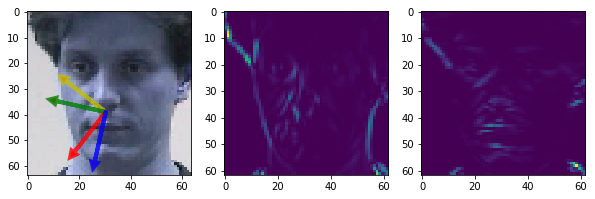

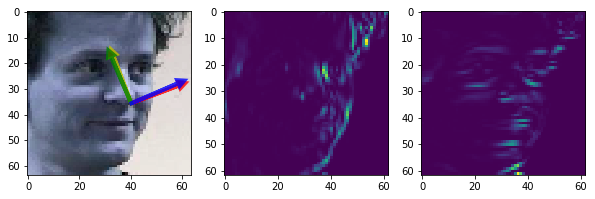

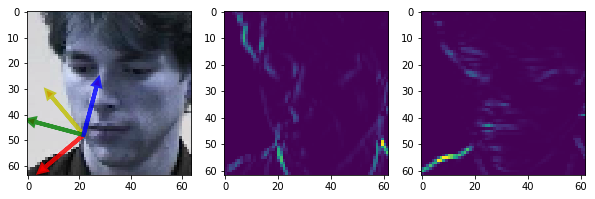

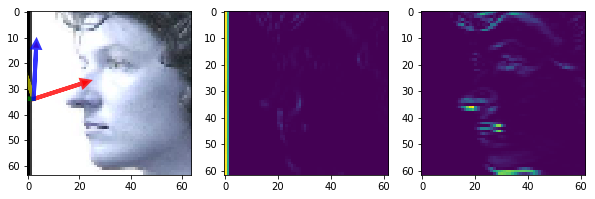

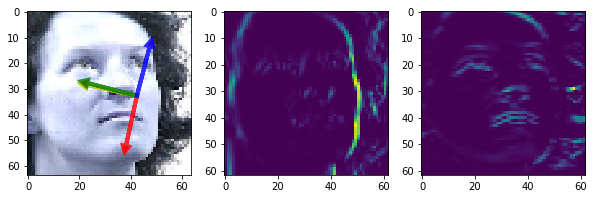

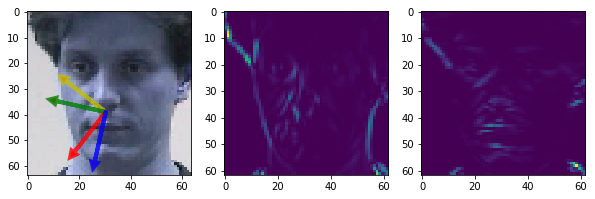

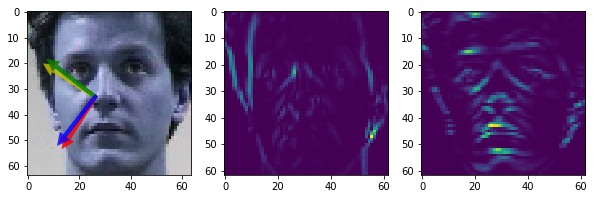

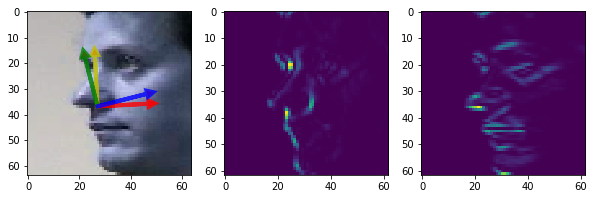

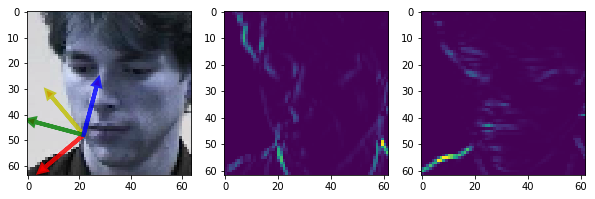

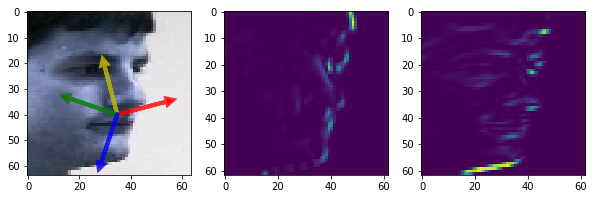

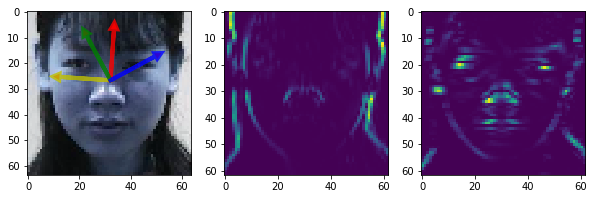

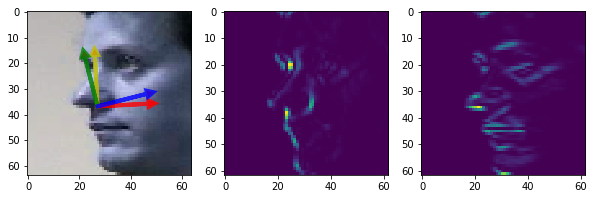

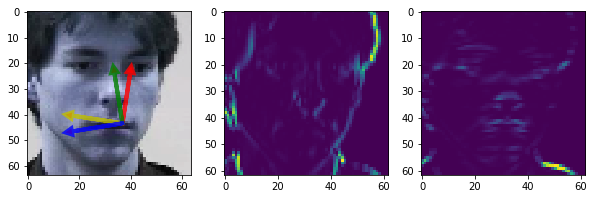

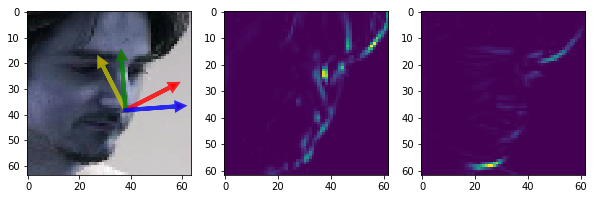

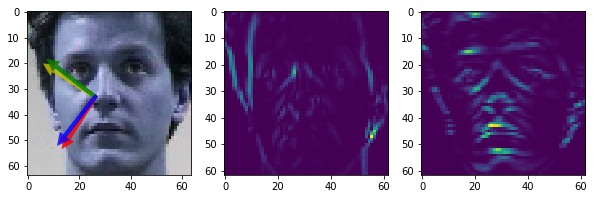

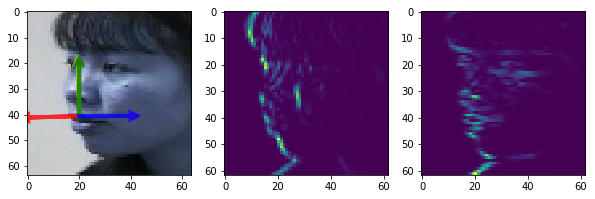

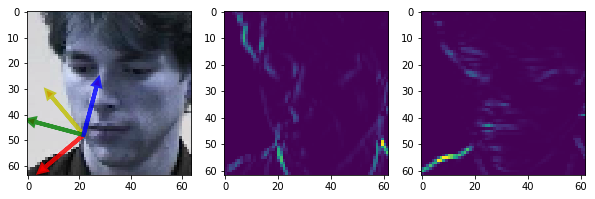

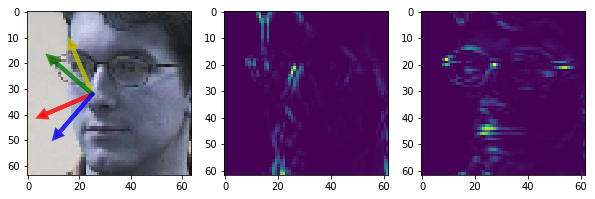

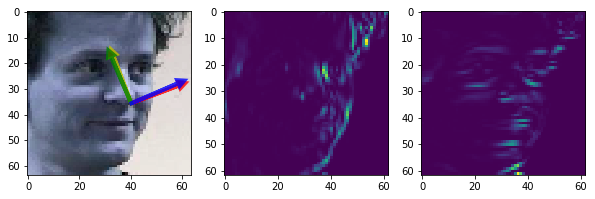

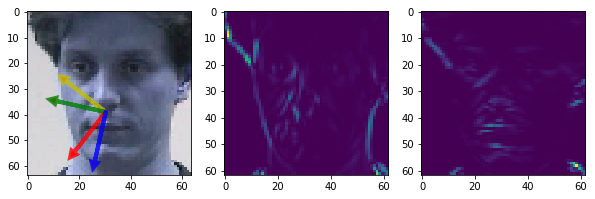

In [159]:
pose_extractor2 = PoseNormalization2(2, (64, 64))
pose_extractor = PoseNormalization(2, (64, 64))

blur = torch.Tensor([[0.25, 0.5, 0.25], [0.5, 1, 0.5], [0.25, 0.5, 0.25]])
grad_x = torch.Tensor([[-1, 0 ,1], [-1, 0, 1], [-1, 0, 1]])
grad_y = torch.Tensor([[-1, -1 ,-1], [0, 0, 0], [1, 1, 1]])

grad_x = grad_x.repeat(1, 3, 1, 1)
grad_y = grad_y.repeat(1, 3, 1, 1)

conv = torch.nn.Conv2d(3, 2, kernel_size=3, bias=False)
conv.weight.data = torch.cat([grad_x, grad_y], dim=0)

conv_add = torch.nn.Conv2d(2, 1, kernel_size=1)




for _ in range(20):
    index = np.random.randint(32)
    print(index)
    current_img = img[index:index+1, :, :, :]
    current_img_edge = conv(current_img)
    current_img_edge = current_img_edge ** 2
    current_img_edge = current_img_edge / current_img_edge.sum()
    current_img_x = current_img_edge[:, 0:1]
    current_img_y = current_img_edge[:, 1:2]
#     print(current_img_x.max())
#     print(current_img_y.max())
    

    img_tensor, means_orig, orientations_orig, confidence, theta, (L1, L2) = pose_extractor(current_img_edge)
    _, means_orig2, orientations_orig2, confidence2, theta2, (L1, L2) = pose_extractor2(current_img_edge)
#     print(confidence)
#     print()
    mean = means_orig[0, :, 0]
    orientation1 = -1*orientations_orig[0, :, 0]
    orientation2 = orientations_orig[0, :, 1]
    
    mean2 = means_orig2[0, :, 0]
    orientation12 = -1*orientations_orig2[0, :, 0]
    orientation22 = orientations_orig2[0, :, 1]

    fig, ax = plt.subplots(1, 3, figsize=(10, 5))
    ax[0].imshow(utils.tensor_to_numpy_img(current_img))
    ax[1].imshow(utils.tensor_to_numpy_img(torch.abs(current_img_x)))
    ax[2].imshow(utils.tensor_to_numpy_img(torch.abs(current_img_y)))

    plot_arrow_img(ax[0], mean, orientation1, (64, 64), color='y', arrow_scale=20, alpha=0.8)
    plot_arrow_img(ax[0], mean, orientation2, (64, 64), color='r', arrow_scale=20, alpha=0.8)
    
    plot_arrow_img(ax[0], mean2, orientation12, (64, 64), color='g', arrow_scale=20, alpha=0.8)
    plot_arrow_img(ax[0], mean2, orientation22, (64, 64), color='b', arrow_scale=20, alpha=0.8)